In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [2]:
# Load dataset into a DataFrame
file_path = 'Resources/vaccine_hesitancy_clean.csv'
Vaccine_Hesitancy_df = pd.read_csv(file_path)
Vaccine_Hesitancy_df.head()

,percent_hispanic,percent_non_hispanic_american_indianalaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native_hawaiianpacific_islander,percent_non_hispanic_white,social_vulnerability_index,cvac_level_of_concern_for_vaccination_rollout,estimated_hesitant
0,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,0.93,0.94,0.23
1,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,0.73,0.82,0.23
2,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,0.70,0.80,0.22
3,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,0.75,0.68,0.23
4,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,0.58,0.87,0.26


In [3]:
# Separate features(X) from target(y)
y = Vaccine_Hesitancy_df["estimated_hesitant"]
X = Vaccine_Hesitancy_df.drop(['estimated_hesitant'], axis = 1)

In [4]:
# Confirm the target column has been dropped 
X.head()

,percent_hispanic,percent_non_hispanic_american_indianalaska_native,percent_non_hispanic_asian,percent_non_hispanic_black,percent_non_hispanic_native_hawaiianpacific_islander,percent_non_hispanic_white,social_vulnerability_index,cvac_level_of_concern_for_vaccination_rollout
0,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,0.93,0.94
1,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,0.73,0.82
2,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,0.70,0.80
3,0.0249,0.0015,0.0049,0.0617,0.0000,0.8895,0.75,0.68
4,0.0901,0.4588,0.1968,0.0322,0.0100,0.1321,0.58,0.87


Random Forest Regression

In [5]:
# Import dependencies
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state = 42) 

In [6]:
# Train the model with 70% of data and Test with remaining 30% data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [7]:
# Fit the model 
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

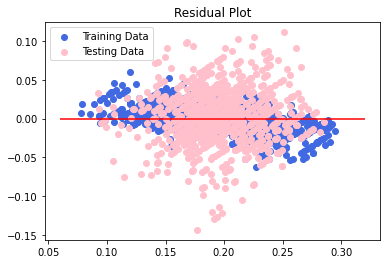

In [8]:
# Plot the training and testing data 
import matplotlib.pyplot as plt
plt.scatter(random_forest.predict(X_train), random_forest.predict(X_train) - y_train, c="royalblue", label="Training Data")
plt.scatter(random_forest.predict(X_test), random_forest.predict(X_test) - y_test, c="pink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max(), colors="red")
plt.title("Residual Plot")
plt.show()

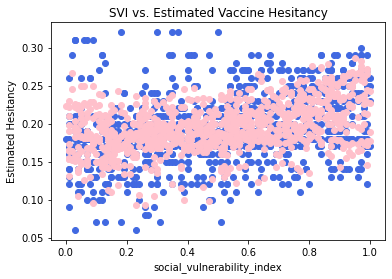

In [9]:
# Visualize model predictions for one feature
plt.scatter(X_test["social_vulnerability_index"].values, y_test, color = 'royalblue')
plt.scatter(X_test["social_vulnerability_index"].values, y_pred, color = 'pink')
plt.title('SVI vs. Estimated Vaccine Hesitancy')
plt.xlabel('social_vulnerability_index')
plt.ylabel('Estimated Hesitancy')
plt.show() 

In [10]:
# Mean absolute error, mean squared error, r squared score, explained variance scor
print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("R Squared Score: ", r2_score(y_test,y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test,y_pred))

Mean Absolute Error:  0.025843266171792157
Mean Squared Error:  0.001178815440084836
R Squared Score:  0.4366239872338896
Explained Variance Score:  0.43779166797622604


In [11]:
# Export data for visualizations
random_forest_regression_mlen = pd.DataFrame(X_test)
random_forest_regression_mlen['actual_y'] = y_test
random_forest_regression_mlen['predict_y']= y_pred
random_forest_regression_mlen.to_csv('Resources/random_forest_regression_mlen.csv')